<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_006_multi_camp_tf_2_0/_014_tf_2_RNN_hello_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.3.0


## input tensor, target tensor 준비 (훈련 데이터)
- imdb 영화 리뷰 데이터 down

In [3]:
# num_word : 전처리가 끝낸 (정렬이 되어 있는) 데이터 중 상위 10000개 데이터를 가져온다.
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
len(input_train), len(input_test)

(25000, 25000)

In [5]:
input_train.shape, input_test.shape

((25000,), (25000,))

In [6]:
# 각 숫자 하나는 단어를 의미한다.
input_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## 입력 데이터의 전처리
- RNN 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [7]:
print(len(input_train[0]))
print(len(input_train[1]))
print(len(input_train[2]))

218
189
141


In [8]:
# 우리가 가지고 있는 모든 단어의 길이를 줄이는 작업을 한다.
# 지정한 값보다 크다면 삭제
# 지정한 값보다 적다면 0으로 채운다.
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)
len(input_train), len(input_test)

(25000, 25000)

In [9]:
input_train.shape, input_test.shape

((25000, 800), (25000, 800))

### left padding
- 앞 부분에 0을 채우는 작업
- 앞에 있는 정보는 분석 진행 시 희미해지게 되기 때문에 일반적인 padding 작업이라 할 수 있다.

In [10]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## RNN 모델 디자인

In [11]:
# embedding layer: 32차원, hidden layer: 1개[32], activation: tanh
model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=32))
model.add(layers.SimpleRNN(units=32))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [12]:
model.summary()
"""
x - wx(32 * 32)
h - wh(32 * 32)
"""


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


'\nx - wx(32 * 32)\nh - wh(32 * 32)\n'

## 모델의 학습 정보 설정

In [13]:
# loss: binary crossentropy / optimizer : rmsprop / metrics : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics='acc')

## 모델에 input, target 데이터 연결 후 학습

In [14]:
# batch size : 128, epochs : 10, validation data ste percent : 20%
history = model.fit(x=input_train, y=y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 37s 235ms/step - loss: 0.6028 - acc: 0.6676 - val_loss: 0.4421 - val_acc: 0.7990
Epoch 2/10
157/157 [==============================] - 36s 231ms/step - loss: 0.3728 - acc: 0.8451 - val_loss: 0.3736 - val_acc: 0.8414
Epoch 3/10
157/157 [==============================] - 36s 230ms/step - loss: 0.2897 - acc: 0.8855 - val_loss: 0.6746 - val_acc: 0.7654
Epoch 4/10
157/157 [==============================] - 36s 232ms/step - loss: 0.2306 - acc: 0.9122 - val_loss: 0.3978 - val_acc: 0.8214
Epoch 5/10
157/157 [==============================] - 36s 232ms/step - loss: 0.1897 - acc: 0.9307 - val_loss: 0.3831 - val_acc: 0.8514
Epoch 6/10
157/157 [==============================] - 36s 232ms/step - loss: 0.1503 - acc: 0.9456 - val_loss: 0.3981 - val_acc: 0.8414
Epoch 7/10
157/157 [==============================] - 36s 232ms/step - loss: 0.1193 - acc: 0.9592 - val_loss: 0.4347 - val_acc: 0.8630
Epoch 8/10
157/157 [==============================] - 3

## 학습과정의 시각화 및 성능 테스트

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
# 차트의 x축을 위한 epoch 정보 설정
epochs = range(1, len(acc) + 1)

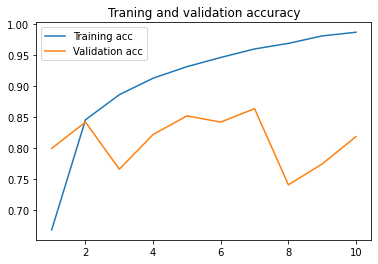

In [19]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label="Training acc")
plt.plot(epochs, val_acc, label="Validation acc")
plt.title("Traning and validation accuracy")
plt.legend()
plt.show()

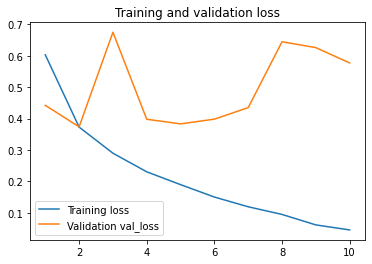

In [20]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation val_loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc = model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 22s 28ms/step - loss: 0.5989 - acc: 0.8177


In [24]:
test_loss, test_acc

(0.5988859534263611, 0.8177199959754944)